# Credit Card Fraud Detection Model

## Importing Libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import imblearn
imblearn.__version__
%matplotlib inline
dataset = pd.read_csv('creditcard.csv');

## Data Preprocessing

In [2]:
dataset.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
dataset.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Identifying and removing duplicated colums, constant and quasi-constant colums

In [5]:
from sklearn.model_selection import train_test_split
from feature_engine.selection import DropDuplicateFeatures, DropConstantFeatures

X_train, X_test, y_train, y_test = train_test_split(dataset.drop(columns='Class'),dataset['Class'],test_size=0.25, random_state=0)

In [6]:
sel=DropConstantFeatures(tol=0.998, variables =None,missing_values='raise')
sel.fit(X_train)

DropConstantFeatures(tol=0.998)

In [7]:
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

X_train.shape, X_test.shape

((213605, 30), (71202, 30))

In [8]:
sel = DropDuplicateFeatures(variables=None, missing_values='raise')
sel.fit(X_train)

DropDuplicateFeatures(missing_values='raise')

In [9]:
sel.duplicated_feature_sets_

[]

In [10]:
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

X_train.shape, X_test.shape

((213605, 30), (71202, 30))

### Mutual information

In [11]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile
mi =mutual_info_classif(X_train, y_train)
mi


array([0.00194583, 0.00230288, 0.00327254, 0.00489097, 0.00501739,
       0.00252965, 0.00236581, 0.00388293, 0.0020805 , 0.00424456,
       0.00747044, 0.00691841, 0.00765501, 0.00047533, 0.00812684,
       0.00034204, 0.00619611, 0.00835388, 0.00431406, 0.00143742,
       0.00128833, 0.00262494, 0.00052993, 0.00089544, 0.00073904,
       0.00062284, 0.00060485, 0.00243427, 0.00180682, 0.0013744 ])

Text(0, 0.5, 'Mutual Information')

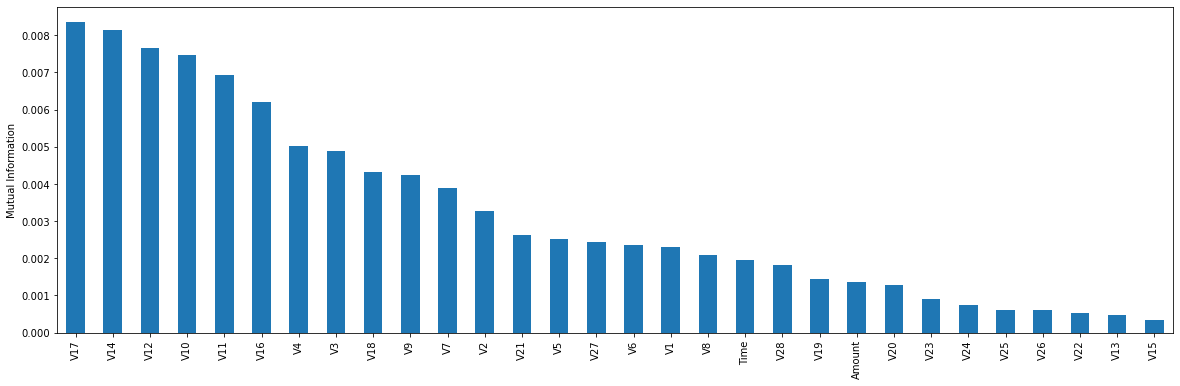

In [12]:
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False).plot.bar(figsize=(20,6))
plt.ylabel('Mutual Information')

### Determining Feature Importance using Chi-square

In [13]:
from scipy.stats import chi2_contingency


In [14]:
#chi_ls =[]
#for feature in X_train.columns:
    #c=pd.crosstab(y_train, X_train[feature])
    #p_value = chi2_contingency(c)[1]
    #chi_ls.append(p_value)

In [15]:
#pd.Series(chi_ls, index=X_train.columns).sort_values(ascending=True).plot.bar(rot=45)
#plt.ylabel('p value')
#plt.title('Feature importance based on chi-square test')

## Exploratory Data Analysis

### Histogram 

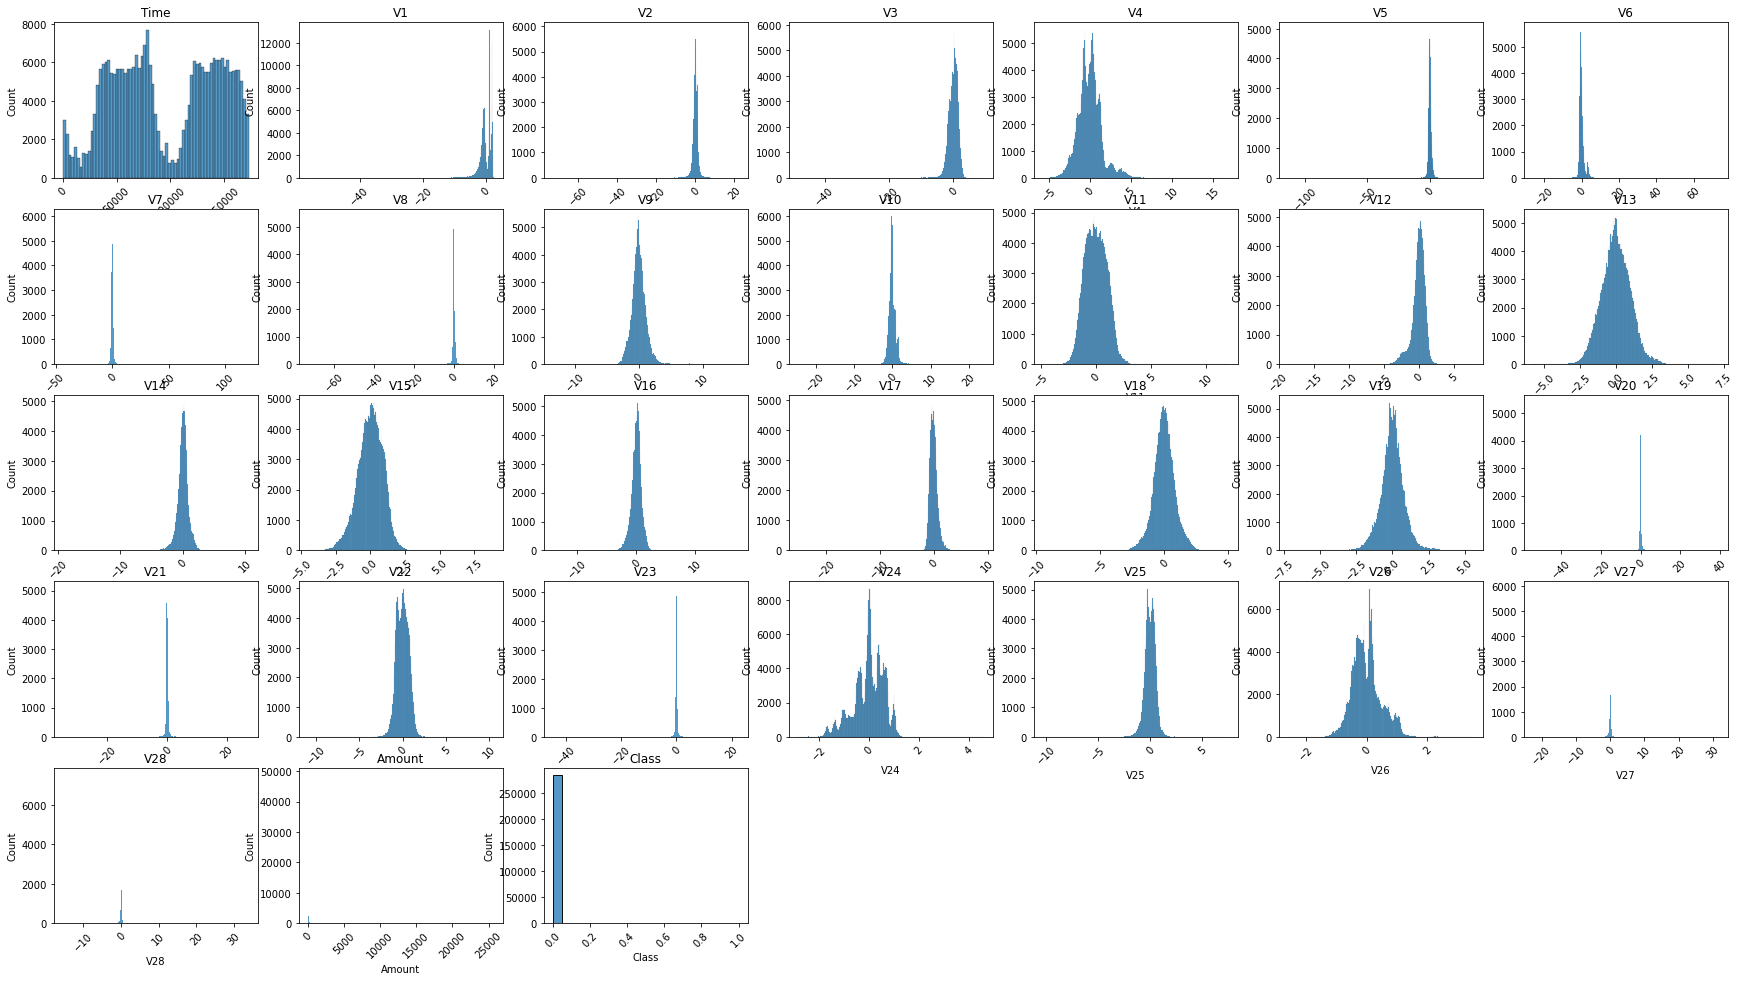

In [16]:
plt.figure(figsize=(30,20))
for i,col in enumerate(dataset.columns,1):
    plt.subplot(6,7,i)
    sns.histplot(dataset[col])
    f= plt.gca()
    f.set_title(dataset.columns.values[i-1])
    
    plt.xticks(rotation=45)

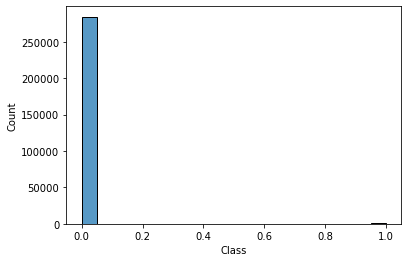

In [17]:
sns.histplot(dataset['Class'])
f= plt.gca()

In [18]:
y= dataset['Class']

In [19]:
y.value_counts()

0    284315
1       492
Name: Class, dtype: int64

### Correlating Matrix

<AxesSubplot:title={'center':'Correlation with Response Variable'}>

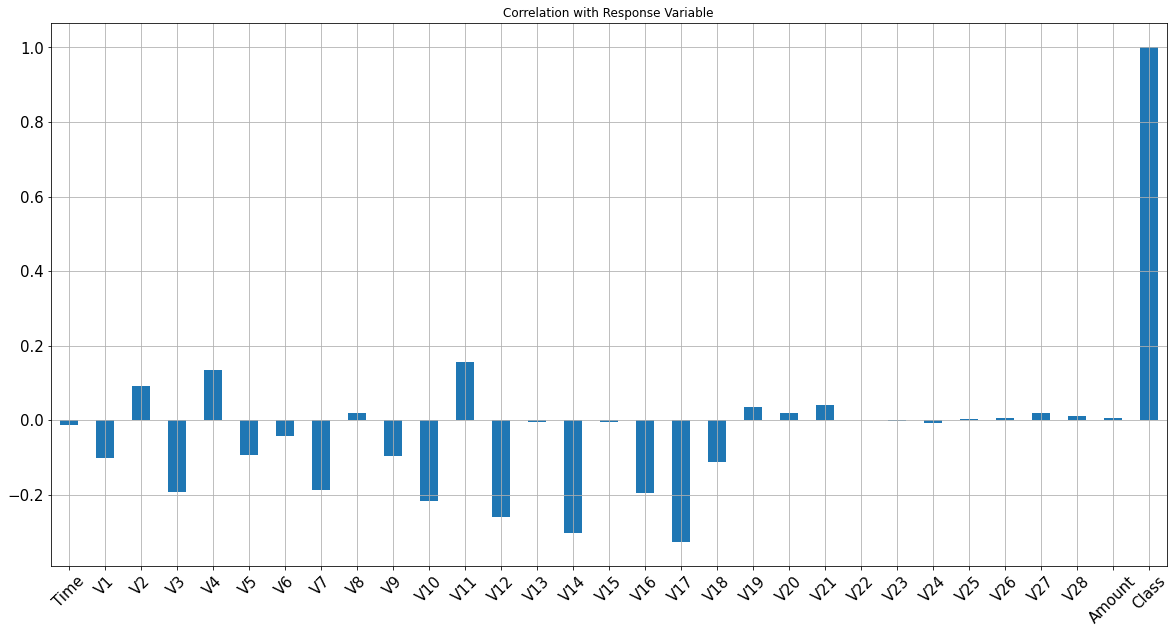

In [20]:
dataset.corrwith(dataset['Class']).plot.bar(figsize=(20,10), title='Correlation with Response Variable', fontsize=15, rot=45, grid =True)

In [21]:
corr = dataset.drop(columns=['Class']).corr()

In [22]:
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,-5.086602e-02,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,4.654551e-16,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,2.506675e-16,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,-9.316409e-16,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.857247e-16,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.554057e-16,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,-1.858755e-16,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,9.379684e-16,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,2.033737e-16,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,-2.343720e-16,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246


C:\Users\f5481198\AppData\Local\Temp\ipykernel_13888\3599741671.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr,dtype=np.bool


<AxesSubplot:>

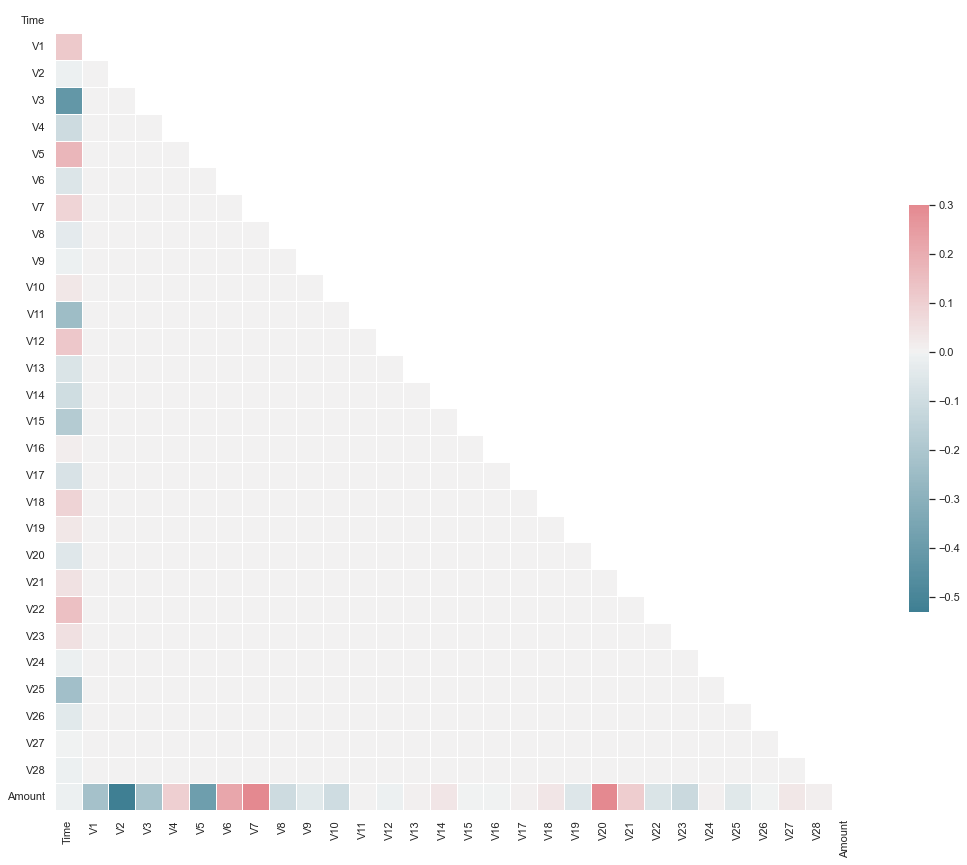

In [23]:
sns.set(style='white')
mask = np.zeros_like(corr,dtype=np.bool
                    )
mask[np.triu_indices_from(mask)]=True
f, ax =plt.subplots(figsize=(18,15))
cmap =sns.diverging_palette(220,10, as_cmap=True)
sns.heatmap(corr, mask=mask,cmap=cmap, vmax=.3,center=0,square=True,linewidths=.5,cbar_kws={"shrink": .5})

In [24]:
## Removing Correlated features
dataset1 = dataset.drop(columns=['Class'])

def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix= dataset1.corr()
    
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                print(abs(corr_matrix.iloc[i, j]), corr_matrix.columns[i], corr_matrix.columns[j])
                colname = corr_matrix.columns[j]
                col_corr.add(colname)
                
    return col_corr

In [25]:
corr_features=correlation(dataset1,0.75)

In [26]:
len(set(corr_features))

0

### Box Plots

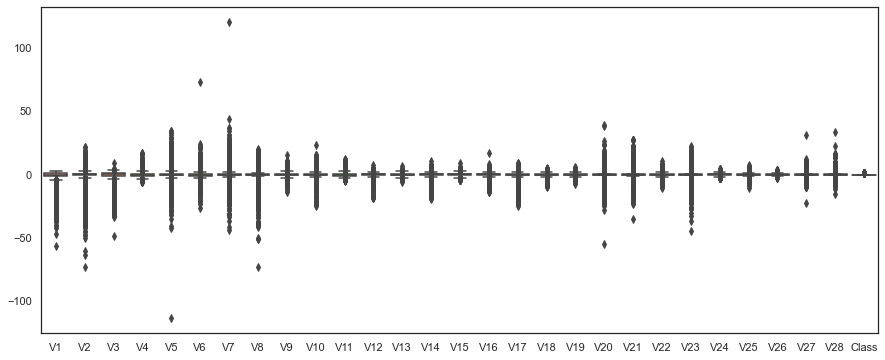

In [27]:
dataset2=dataset.drop(columns=['Time','Amount'])
plt.figure(figsize=(15,6))
sns.boxplot(data=dataset2)
plt.show()

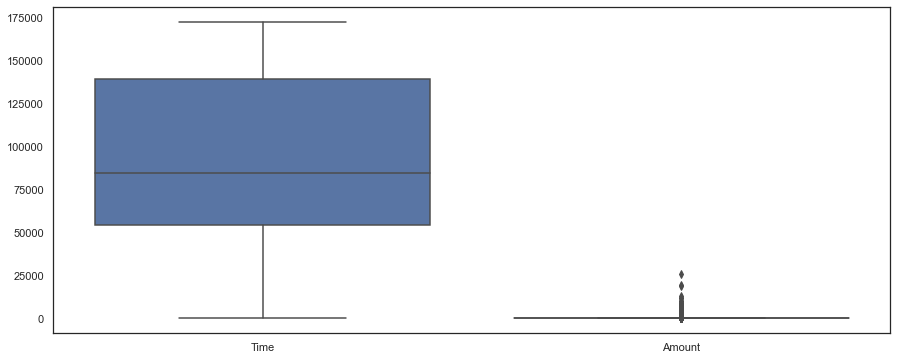

In [28]:
plt.figure(figsize=(15,6))
sns.boxplot(data=dataset[['Time','Amount']])
plt.show()

### Removing outliers

In [29]:
#def remove_outlier(col):
    #sorted(col)
    #Q1, Q3 = col.quantile([0.25,0.75])
    #IQR = Q3-Q1
    #lower_range = Q1 - (1.5 * IQR)
    #upper_range = Q3 + (1.5 * IQR)
    #return lower_range, upper_range

In [30]:
#dataset3=dataset.drop(columns=['Class'])
#for i in dataset2.columns:
    #lower_range, upper_range = remove_outlier(dataset2[i])
    #dataset3[i] = np.where(dataset3[i] > upper_range, upper_range, dataset3[i])
    #dataset3[i] = np.where(dataset3[i] < lower_range, lower_range, dataset3[i])

In [31]:
#plt.figure(figsize=(15,6))
#sns.boxplot(data=dataset[['Time','Amount']])
#plt.show()

In [32]:
#dataset4=dataset.drop(columns=['Time','Amount'])
#plt.figure(figsize=(15,6))
#sns.boxplot(data=dataset4)
#plt.show()

### Handling Imbalalnce Dataset

In [33]:
X= dataset.drop(columns='Class')
y=dataset['Class']
dataset['Class'].value_counts()


0    284315
1       492
Name: Class, dtype: int64

In [34]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy=1)
X_res, y_res = ros.fit_resample(X,y)

In [35]:
X_res['Time'].head(5)

0    0.0
1    0.0
2    1.0
3    1.0
4    2.0
Name: Time, dtype: float64

In [36]:
y_res.value_counts()

0    284315
1    284315
Name: Class, dtype: int64

## Model Building

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.25, random_state=0)

### Feature Scaling 

In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train['Time']= sc.fit_transform(X_train)
X_test['Time']= sc.fit_transform(X_test)

In [39]:
X_train['Time'].head(5)

188281    0.833452
523545   -0.233364
51308    -0.892051
164516    0.602201
469507   -0.407290
Name: Time, dtype: float64

### Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression
log_classifier = LogisticRegression(random_state=0)
log_classifier.fit(X_train,y_train)

C:\Users\f5481198\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score,recall_score
y_pred=log_classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 =f1_score(y_test, y_pred)

results = pd.DataFrame([['Logistic Regression ', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

In [42]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.945589,0.97361,0.916356,0.944116


#### Confusion Matrix

Test Data Accuracy: 0.9456


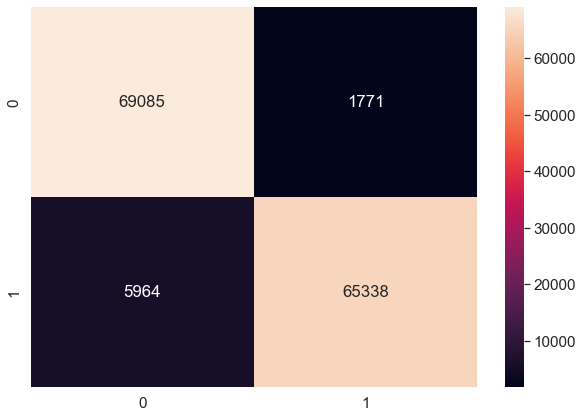

In [43]:
cm = confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

### Random Forest Classifier

In [44]:
from sklearn.ensemble import RandomForestClassifier
RFC_classifier= RandomForestClassifier(random_state=0, n_estimators =100, criterion ='entropy')
RFC_classifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [45]:
y_pred = RFC_classifier.predict(X_test)
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest (n=100)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results = results.append(model_results, ignore_index = True)

C:\Users\f5481198\AppData\Local\Temp\ipykernel_13888\3136238486.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index = True)


In [46]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.945589,0.973610,0.916356,0.944116
1,Random Forest (n=100),0.999958,0.999916,1.000000,0.999958


#### Confusion Matrix

Test Data Accuracy: 1.0000


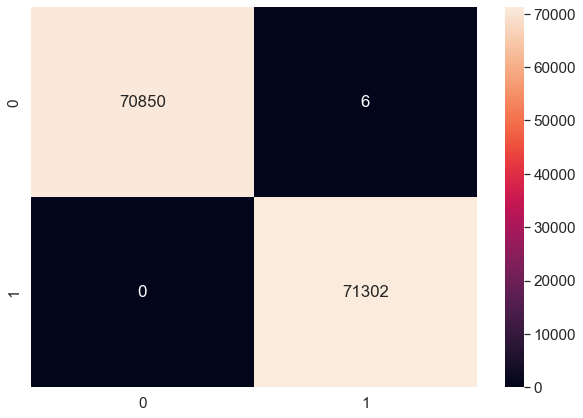

In [47]:
cm = confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

### Decision Tree Classifier

In [48]:
from sklearn.tree import DecisionTreeClassifier
DTC_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DTC_classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [49]:
y_pred = DTC_classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Decision Tree Classifier', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results = results.append(model_results, ignore_index = True)

C:\Users\f5481198\AppData\Local\Temp\ipykernel_13888\2916173778.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index = True)


In [50]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.945589,0.973610,0.916356,0.944116
1,Random Forest (n=100),0.999958,0.999916,1.000000,0.999958
2,Decision Tree Classifier,0.998607,0.999564,0.997658,0.998610


#### Confusion Matrix

Test Data Accuracy: 0.9986


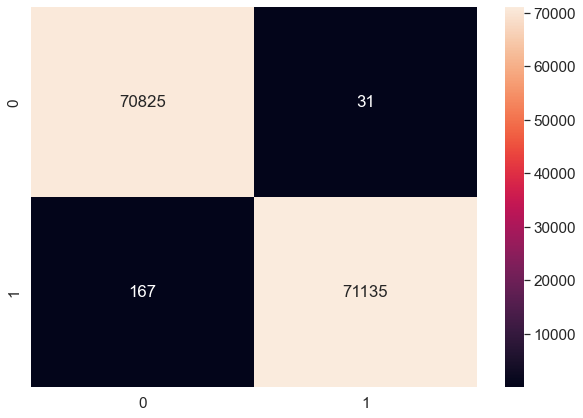

In [51]:
cm = confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

### Feature importance for the Random Forest Classification Model

In [52]:
feat_importance =pd.concat([pd.DataFrame(X_train.columns, columns=['features']),pd.DataFrame(np.transpose(RFC_classifier.feature_importances_), columns=['coef'])], axis=1)

Text(0, 0.5, 'Feature Importance')

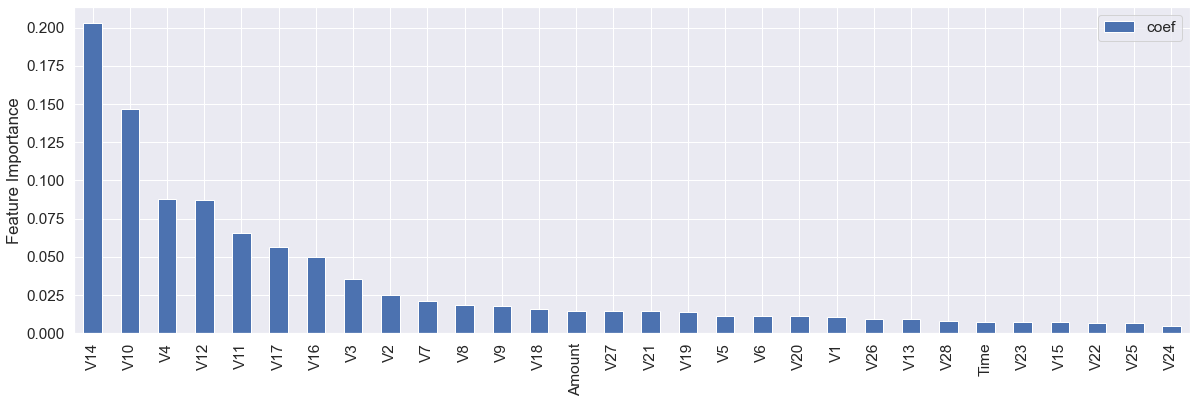

In [53]:
feat_importance.index = X_train.columns
feat_importance.sort_values(by='coef',ascending=False).plot.bar(figsize=(20,6))
plt.ylabel('Feature Importance')


### Feature Selection using Recursive Feature Elimination

In [54]:
from sklearn.feature_selection import RFE
rfe = RFE(RFC_classifier)
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)
print(rfe.ranking_)
X_train.columns[rfe.support_]

[False False False  True  True  True False  True  True False  True  True
  True False  True False  True  True  True  True  True False False False
 False False False False False  True]
[14  8  4  1  1  1  3  1  1  6  1  1  1  9  1 11  1  1  1  1  1  7 13 10
 16 15  2 12  5  1]


Index(['V3', 'V4', 'V5', 'V7', 'V8', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17',
       'V18', 'V19', 'V20', 'Amount'],
      dtype='object')

### Fitting the model to selected features

In [55]:
from sklearn.ensemble import RandomForestClassifier
RFC_classifier2= RandomForestClassifier(random_state=0, n_estimators =100, criterion ='entropy')
RFC_classifier2.fit(X_train[X_train.columns[rfe.support_]],y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [56]:
y_pred = RFC_classifier2.predict(X_test[X_train.columns[rfe.support_]])

In [57]:
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

final_results = pd.DataFrame([['Random Forest (n=100)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

In [58]:
final_results

,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest (n=100),0.999951,0.999902,1.0,0.999951


Test Data Accuracy: 1.0000


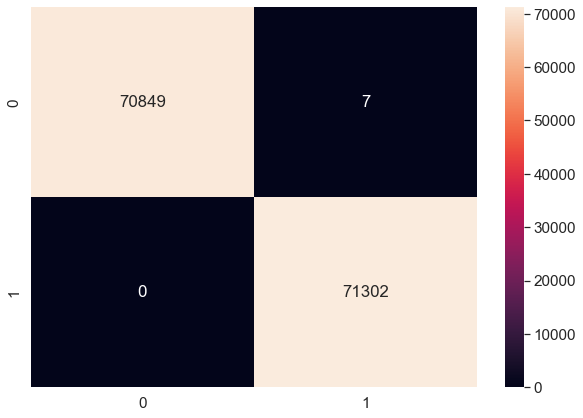

In [59]:
cm = confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

### Applying K-Fold Cross Validation

In [60]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator =RFC_classifier2 ,
                             X = X_train[X_train.columns[rfe.support_]],
                             y = y_train, cv = 10)
print("Random Forest Classifier Accuracy: {:.2f}".format(accuracies.mean()*100))
print("Random Forest Classifier Standard Deviation: {:.2f}".format(accuracies.std()*100))


Random Forest Classifier Accuracy: 1.000 (+/- 0.000)


In [61]:
accuracies.mean()

0.9999507587177134